In [1]:
import copy
import warnings

import numpy as np
import xarray as xr

import sys, pdb, traceback

import matplotlib.pyplot as plt

import rotunno as rt
import qian_helpers
import rotunno_helpers

import copy

import scipy as sp

In [15]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport rotunno, rotunno_helpers, channel_helpers, qian_helpers, piecewise_N_helpers, continuous_N_helpers, convective_helpers

In [6]:
# YMC parameters
L_star = 50*1e3 # m
omega = 2*np.pi/(24*3600)
h = 4*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
L = omega*L_star/(N1*h)
# Q0 = 1.2e-5
# Q0=7.57e-6
Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(-11.5*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

In [99]:
# YMC convection parameters
L_star = 100*1e3 # m
omega = 2*np.pi/(24*3600)
h = 12*1e3
D_star = 4*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
N2 = 0.025
N = N2/N1
L = omega*L_star/(N1*h)
Q0 = 6e-6
# Q0=7.57e-6
# Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 15e3
H2_star_tl = 19e3
H1_star_pw = 17e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h
H1_pw = H1_star_pw / h
D = D_star / h

In [5]:
# YMC test
L_star = 100*1e3 # m
omega = 2*np.pi/(24*3600)
h = 17*1e3
D_star = 4*1e3
h1_star = 17*1e3
H1 = h1_star/h
N1 = 0.01
N2 = 0.025
N = N2/N1
L = omega*L_star/(N1*h)
Q0 = 6e-6
# Q0=7.57e-6
# Q0=3.8e-6
phi = -11.5
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 15e3
H2_star_tl = 19e3
H1_star_pw = 17e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h
H1_pw = H1_star_pw / h
D = D_star / h

In [76]:
# Inversion parameters
L_star = 50*1e3 # m
omega = 2*np.pi/(24*3600)
h = 1*1e3
h1_star = 2*1e3
H1 = h1_star/h
N1 = 0.01
L = omega*L_star/(N1*h)
Q0 = 1.2e-5
# Q0=7.57e-6
phi = 0
f = 2*omega*np.sin(phi*np.pi/180)
A = np.sqrt(1-f**2/omega**2)

H1_star_tl = 1.5e3
H2_star_tl = 2.5e3
H1_tl = H1_star_tl / h
H2_tl = H2_star_tl / h

In [21]:
L

0.363610260832152

In [75]:
ds_pwN = xr.open_dataset('../datasets/paper_pwc_N_3_low_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_tl_N_3_low_fixed.nc')

In [19]:
ds_pwN = xr.open_dataset('../datasets/paper_pwc_N_one_third_low_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_tl_N_one_third_low_fixed.nc')

In [86]:
ds_pwN = xr.open_dataset('../datasets/paper_pwn_YMC_fixed.nc')
ds_cN = xr.open_dataset('../datasets/paper_cn_YMC_fixed.nc')

In [98]:
ds_pwN = xr.open_dataset('../datasets/strat_1.nc')
ds_cN = xr.open_dataset('../datasets/strat_2.nc')

In [100]:
omega = 2*np.pi/(24*3600)
# ds_rotunno_dim = rt.redimensionalise_rotunno(copy.deepcopy(ds_rotunno), h=h, f=f, N=N)
# ds_channel_dim = rt.redimensionalise_channel(copy.deepcopy(ds_channel), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_qian_dim = rt.redimensionalise_qian(copy.deepcopy(ds_qian), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_pwN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_pwN), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
# ds_cN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_cN), h=h, N=N, Q0=Atilde*omega**3*h*np.pi)
ds_pwN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_pwN), h=h, N=N1, Q0=Q0)
ds_cN_dim = rt.redimensionalise_qian(copy.deepcopy(ds_cN), h=h, N=N1, Q0=Q0)

In [78]:
x = ds_pwN_dim.x.values
z = ds_pwN_dim.z.values

X, Z = np.meshgrid(x, z)

Q = Q0/np.pi*(np.pi/2+np.arctan(X/L_star))*np.exp(-Z/h)

In [79]:
X = X/1000
Z = Z/1000

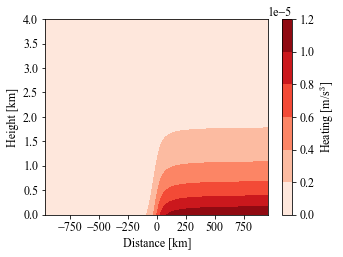

In [80]:
rt.init_fonts()
fig, ax = plt.subplots(figsize=(5,3.6))
levels = np.arange(0,1.4e-5,.2e-5)
con = ax.contourf(X, Z, Q, levels=levels, cmap='Reds')
plt.sca(ax)
cbar = plt.colorbar(con)
cbar.set_ticks(levels)
cbar.set_label(r'Heating [m/s$^3$]')
plt.xticks(np.arange(-750, 800, 250))
plt.xlabel('Distance [km]')
plt.ylabel('Height [km]')

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/phd/theory_paper/heating_1.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

In [101]:
x = ds_pwN_dim.x.values
z = ds_pwN_dim.z.values

X, Z = np.meshgrid(x, z)

Q = Q0*np.exp(-X**2/L_star**2-(Z-h)**2/D_star**2)

In [102]:
X = X/1000
Z = Z/1000

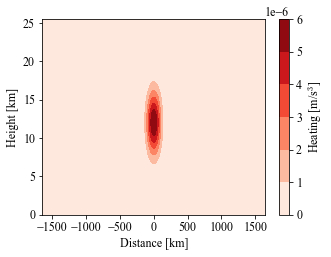

In [104]:
rt.init_fonts()
fig, ax = plt.subplots(figsize=(5,3.6))
levels = np.arange(0,7e-6,1e-6)
con = ax.contourf(X, Z, Q, levels=levels, cmap='Reds')
plt.sca(ax)
cbar = plt.colorbar(con)
cbar.set_ticks(levels)
cbar.set_label(r'Heating [m/s$^3$]')
plt.xticks(np.arange(-1500, 2000, 500))
plt.xlabel('Distance [km]')
plt.ylabel('Height [km]')

plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/phd/theory_paper/heating_2.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.
Plotting u.
Plotting u.


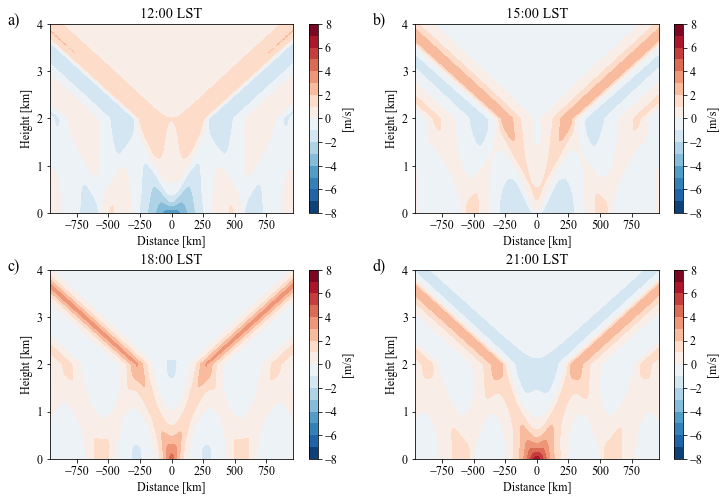

In [33]:
test = ds_pwN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_pwN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=1).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelCont(test, var=var, t_list=[0,2,4,6], cbar_steps=10)
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/phd/theory_paper/soln_pwc_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')

Plotting u.
Plotting u.
Plotting u.
Plotting u.


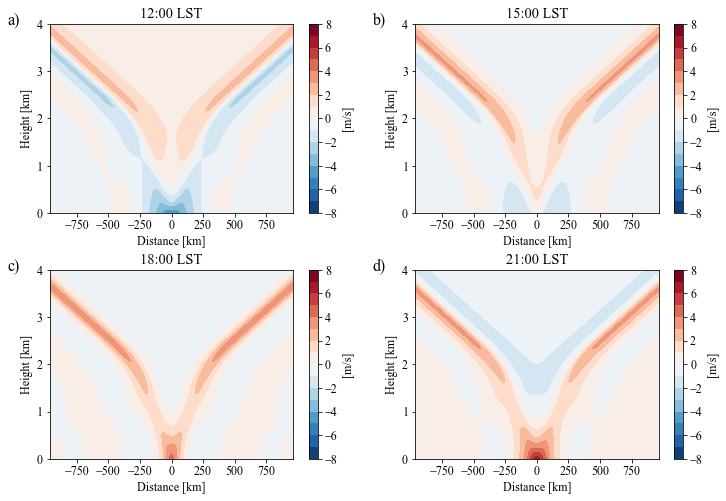

In [47]:
test = ds_cN_dim.sum(dim='mode', keep_attrs=True).sum(dim='forcing', keep_attrs=True)
# test = ds_cN_dim.sum(dim='mode', keep_attrs=True).isel(forcing=2)
# test = ds_cN_dim.isel(mode=0).isel(forcing=0)
# test = ds_pwN_dim.isel(mode=0)
var='u'
# t=4
rt.panelCont(test, var=var, t_list=[0,2,4,6], cbar_steps=10, )
dt = rt.get_current_dt_str()
plt.savefig(
    '/home/student.unimelb.edu.au/shorte1/Documents/phd/theory_paper/soln_cN_{}_{}_{}.png'.format(var, 0, dt), 
    dpi=200, bbox_inches='tight', facecolor='white')